In [1]:
from numpy import genfromtxt
import numpy as np
import sklearn

import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen

import io
import sys
import base64

import matplotlib.pyplot as plt

from PIL import Image

In [2]:
data = genfromtxt('output.csv', delimiter=',')

labels = genfromtxt('labels.csv', delimiter=',')

labels = labels.astype(int)

In [3]:
tooltip_s = []
for i in range(10000):
    output = io.BytesIO()
    im = Image.open("images/"+str(i)+".jpg")
    np_im = np.array(im)
    img = Image.fromarray(np_im)  # Data was a flat row of 64 "pixels".
    img.save(output, format="PNG")
    contents = output.getvalue()
    img_encoded = base64.b64encode(contents)
    img_tag = """<img src="data:image/png;base64,{}">""".format(img_encoded.decode('utf-8'))
    tooltip_s.append(img_tag)
    output.close()
    
tooltip_s = np.array(tooltip_s)


In [4]:
r = [np.argmax(x) for x in data.tolist()]
r = np.array(r)

In [5]:
mapper = km.KeplerMapper(verbose = 1)

KeplerMapper()


In [6]:
projected_data = mapper.fit_transform(data,
                                      projection=sklearn.manifold.TSNE(random_state = 218159000))

..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=218159000, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (10000, 10)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=218159000, verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.873s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 100

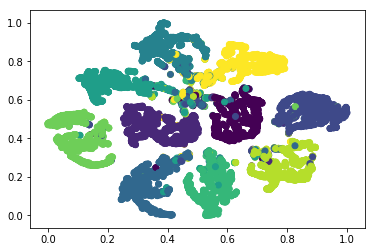

In [7]:
a = []
for l, g in projected_data.tolist():
    a.append(l)
    
b = []
for l, g in projected_data.tolist():
    b.append(g)
    
fig, ax = plt.subplots()
ax.scatter(a, b, c = labels)
plt.show()

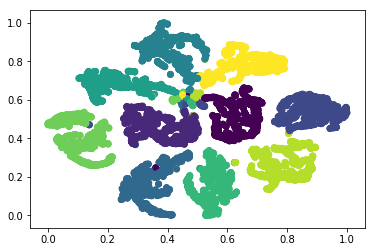

In [8]:
fig, ax = plt.subplots()
ax.scatter(a, b, c = r)
plt.show()

In [9]:
graph = mapper.map(projected_data,
                   data,
                   cover = km.Cover(n_cubes = 35, perc_overlap = 0.25),
                   clusterer = sklearn.cluster.DBSCAN(eps = 0.4, min_samples = 8))

Mapping on data shaped (10000, 10) using lens shaped (10000, 2)

Creating 1225 hypercubes.

Created 1105 edges and 516 nodes in 0:00:00.670207.


In [10]:
html = mapper.visualize(graph,
                 title = "Mapper",
                 path_html = "Mapper.html",
                 color_function = labels,
                 custom_tooltips = tooltip_s)

# html2 = mapper.visualize(graph,
#                 title = "Mapper2",
#                 path_html = "Mapper2.html",
#                 color_function = labels,
#                 custom_tooltips = labels)

# html3 = mapper.visualize(graph,
#                 title = "Mapper3",
#                 path_html = "Mapper3.html",
#                 color_function = r,
#                 custom_tooltips = tooltip_s)

# html4 = mapper.visualize(graph,
#                 title = "Mapper4",
#                 path_html = "Mapper4.html",
#                 color_function = r,
#                 custom_tooltips = r)

Wrote visualization to: Mapper.html


In [87]:
l =[]
x = mapper.data_from_cluster_id('cube343_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube344_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube343_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

62
92
565
627
791
2380
2448
2771
2877
3225
3490
3755
3970
4505
5429
5525
5639
5897
6565
7243
7426
8520
8928
9170


In [88]:
labels[[62,
92,
565,
627,
791,
2380,
2448,
2771,
2877,
3225,
3490,
3755,
3970,
4505,
5429,
5525,
5639,
5897,
6565,
7243,
7426,
8520,
8928,
9170]]

array([9, 9, 4, 9, 5, 9, 9, 4, 4, 7, 4, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 4,
       9, 9])

In [86]:
l =[]
x = mapper.data_from_cluster_id('cube344_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube345_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube344_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

1435
2054
2216
2414
2926
3985
4174
6393
7254
9890


In [89]:
labels[[1435,
2054,
2216,
2414,
2926,
3985,
4174,
6393,
7254,
9890]]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [84]:
l =[]
x = mapper.data_from_cluster_id('cube323_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube345_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube323_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

2148
3924


In [85]:
labels[[2148, 3924]]

array([4, 9])

In [61]:
l =[]
x = mapper.data_from_cluster_id('cube323_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube301_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube323_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

916
4369


In [83]:
labels[[916, 4369]]

array([4, 9])

In [65]:
l =[]
x = mapper.data_from_cluster_id('cube274_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube301_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube274_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

2645
4425
4444
7886


In [82]:
labels[[2645,
4425,
4444,
7886]]

array([4, 9, 9, 2])

In [66]:
l =[]
x = mapper.data_from_cluster_id('cube274_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube275_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube274_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

139
1465
3172
3249
3410
4223
4373
5159
5564
6185
6553
7153
7764
7857


In [78]:
labels[[139, 1465, 3172, 3249, 3410, 4223, 4373, 5159, 5564, 6185, 6553, 7153, 7764, 7857]]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2])

In [72]:
l =[]
x = mapper.data_from_cluster_id('cube275_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube251_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube275_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

748
4197
6295


In [79]:
labels[[748,
4197,
6295]]

array([4, 4, 4])

In [73]:
l =[]
x = mapper.data_from_cluster_id('cube225_cluster0', graph, data).tolist()
y = mapper.data_from_cluster_id('cube251_cluster0', graph, data).tolist()
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == y[j]:
            l.append(i)

z = mapper.data_from_cluster_id('cube225_cluster0', graph, data)[l].tolist()            
            
for i in range(len(z)):
    for j in range(10000):
        if z[i] == data.tolist()[j]:
            print(j)
            break

2173
2819
2872
8754


In [81]:
labels[[2173,
2819,
2872,
8754]]

array([4, 4, 4, 4])